In [6]:
import matplotlib.pyplot as plt



class Graphes:

    @staticmethod
    def accuracy_loss_graphe(historique):
        # Affichage accuracy - loss
        fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
        axs = axs.flatten()
        axs[0].plot(historique.history["accuracy"], label='Accuracy Train')
        axs[0].plot(historique.history["val_accuracy"], label='Accuracy Test')
        axs[0].set_title(f"Evolution de l'accuracy")
        axs[0].set_xlabel("Epoch")
        axs[0].set_ylabel("Accuracy")
        axs[0].legend()

        axs[1].plot(historique.history["loss"], label='Loss Train')
        axs[1].plot(historique.history["val_loss"], label='Loss Test')
        axs[1].set_title(f"Evolution de la perte")
        axs[1].set_xlabel("Epoch")
        axs[1].set_ylabel("Loss")
        axs[1].legend()
        plt.show()

In [5]:
import numpy as np
import random
from PIL import Image

class ImageGenerator:

    @staticmethod
    def create_imperfect_image(image, image_size=(56, 56)):

        new_image = np.ones((*image_size, image.shape[2]), dtype=np.uint8)

        max_offset = image_size[0] - image.shape[0]
        random_x = random.randint(0, max_offset)
        random_y = random.randint(0, max_offset)

        new_image[random_x:random_x+image.shape[0], random_y:random_y+image.shape[1], :] = image
        return new_image

In [ ]:
import numpy as np
import tensorflow as tf


# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalisation
x_train = x_train / 255.0
x_test = x_test / 255.0

# Inversion
x_train = 1 - x_train
x_test = 1 - x_test




In [3]:
# Apercu dataset
for i in range(5):
    plt.figure()
    plt.imshow(x_train[i], cmap="grey")
    plt.axis('off')
    plt.show()

NameError: name 'plt' is not defined

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, LSTM, Reshape, BatchNormalization, Bidirectional

from tensorflow.keras.optimizers import Adam



model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=2),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=2),
    Dropout(0.2),

    Reshape((-1, 128)),
    Bidirectional(LSTM(128, activation='tanh')),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation="softmax")
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrainement
historique = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.8741 - loss: 0.3985 - val_accuracy: 0.9877 - val_loss: 0.0397
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9752 - loss: 0.0823 - val_accuracy: 0.9877 - val_loss: 0.0392
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9809 - loss: 0.0620 - val_accuracy: 0.9899 - val_loss: 0.0328
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9840 - loss: 0.0521 - val_accuracy: 0.9908 - val_loss: 0.0323
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9863 - loss: 0.0458 - val_accuracy: 0.9913 - val_loss: 0.0301
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9875 - loss: 0.0416 - val_accuracy: 0.9918 - val_loss: 0.0253
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9889 - loss: 0.0354 - val_accuracy: 0.9909 - val_loss: 0.0318
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9894 -

In [ ]:
# Sauvegarde
model.save('model/mon_model.h2')

In [8]:
# Chargement du modele
from tensorflow.keras.models import load_model

model = load_model('model/mon_modele.h5')


2025-02-21 15:14:57.729412: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'


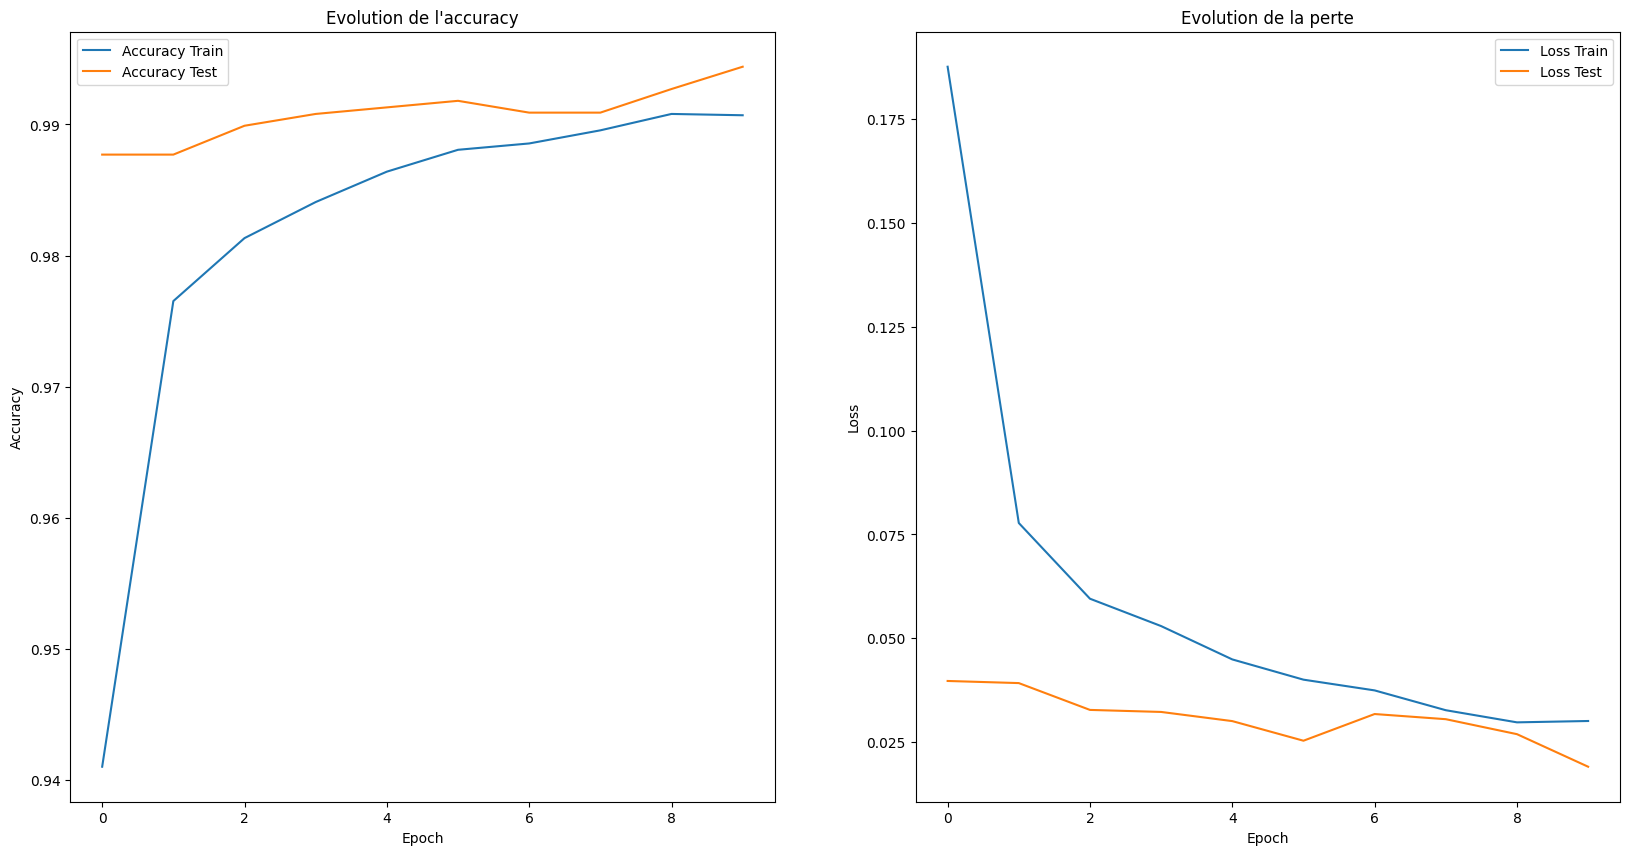

In [7]:
Graphes.accuracy_loss_graphe(historique)

2025-02-21 15:15:25.483093: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



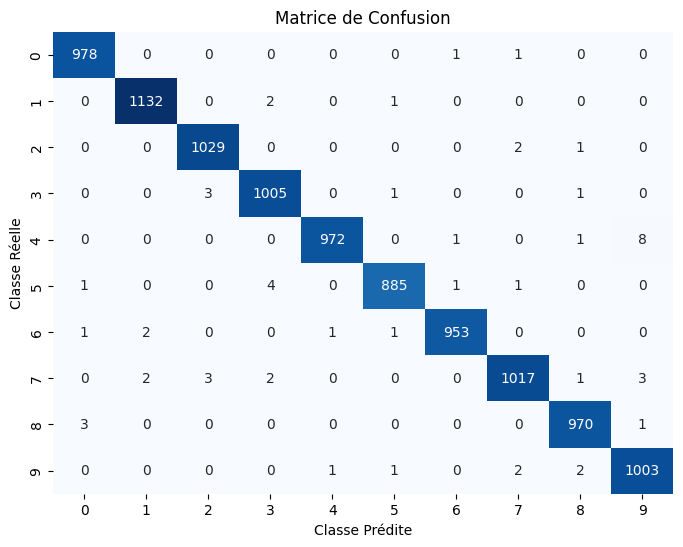

In [9]:
# Stats et matrice de confusion
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predictions = np.argmax(model.predict(x_test), axis=1)

print(classification_report(y_test, predictions, target_names=["0","1","2","3","4","5", "6","7", "8", "9"]))

confusion = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.title("Matrice de Confusion")
plt.savefig("img/matrice_conf_1.png", format="png")
plt.show()


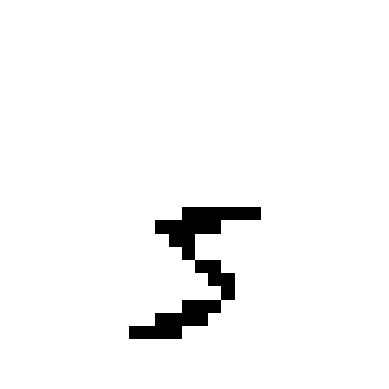

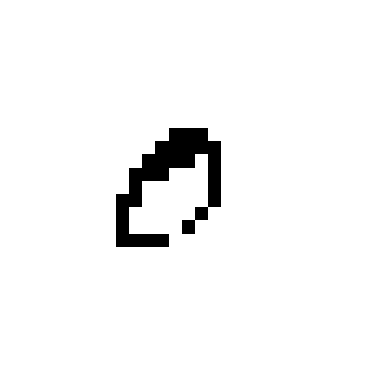

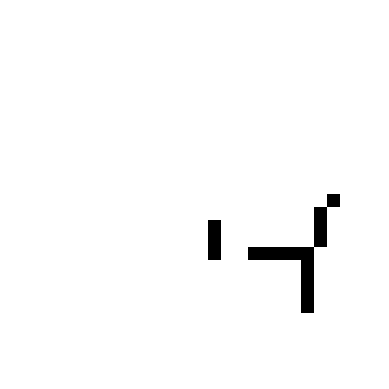

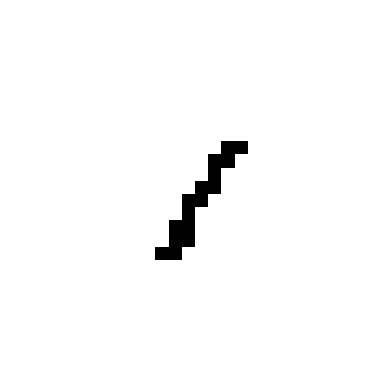

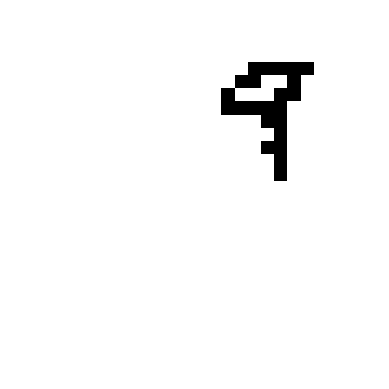

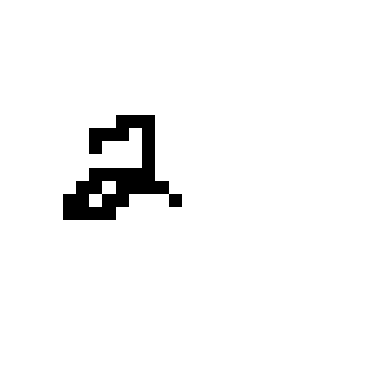

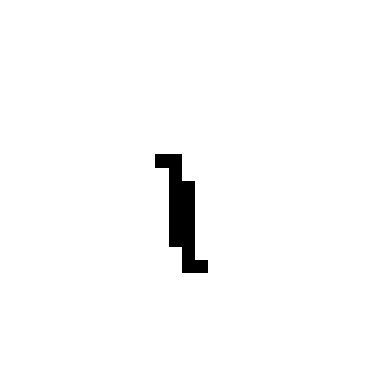

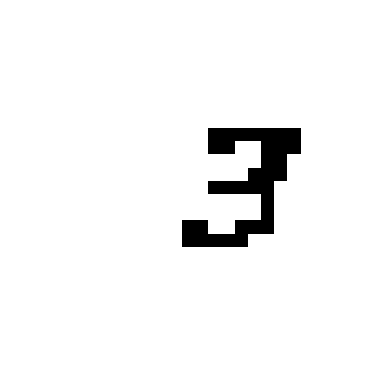

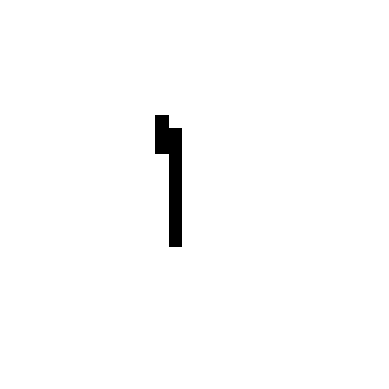

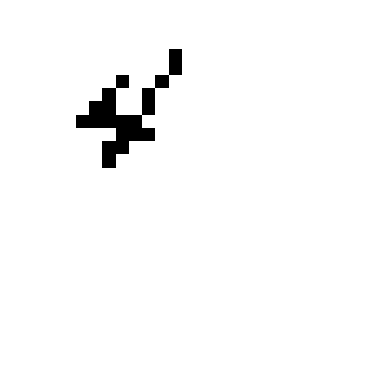

In [10]:
# Création image 56 x 56 avec chiffre positioné aléatoirement
# L'image est ensuite redimensionnée -> 28 x 28

new_images = []
new_images_label = np.array([])

for i in range(100):
    imperfect_image = ImageGenerator.create_imperfect_image(x_train[i])

    # imperfect_image = tf.image.resize(imperfect_image, (28, 28))
    imperfect_image = tf.expand_dims(imperfect_image, axis=0)
    imperfect_image = tf.nn.max_pool2d(imperfect_image, ksize=2, strides=2, padding="VALID")

    imperfect_image = imperfect_image.numpy().reshape(28, 28, 1)


    new_images.append(imperfect_image)
    new_images_label = np.append(new_images_label, y_train[i])

    if i < 10:
      plt.figure()
      plt.imshow(imperfect_image, cmap="grey")
      plt.axis('off')
      plt.show()

new_images = np.array(new_images)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       0.67      0.86      0.75        14
         2.0       0.25      0.33      0.29         6
         3.0       0.25      0.36      0.30        11
         4.0       1.00      0.18      0.31        11
         5.0       0.50      0.40      0.44         5
         6.0       0.50      0.27      0.35        11
         7.0       0.80      0.40      0.53        10
         8.0       0.20      0.25      0.22         8
         9.0       0.13      0.36      0.20        11

    accuracy                           0.35       100
   macro avg       0.43      0.34      0.34       100
weighted avg       0.44      0.35      0.34       100



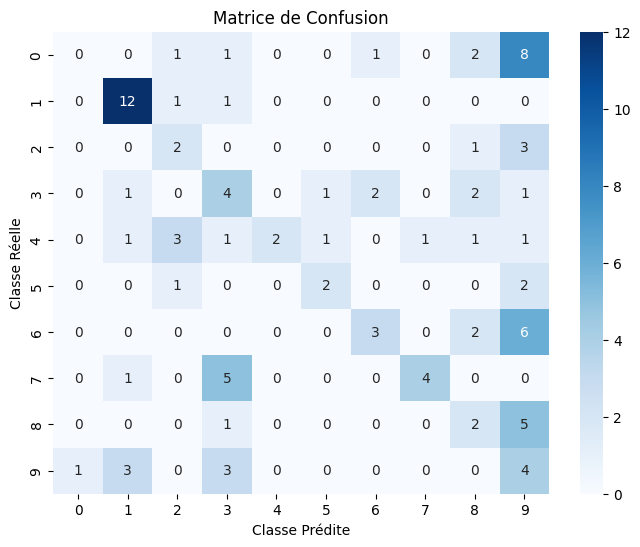

In [11]:
# Résultat sur les nouvelles données
new_pred = np.argmax(model.predict(new_images), axis=1)

print(classification_report(new_images_label, new_pred))

confusion = confusion_matrix(new_images_label, new_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=True)

plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.title("Matrice de Confusion")
plt.savefig("img/matrice_conf_2.png", format="png")
plt.show()

